# Dataset

In [1]:
from google.colab import files
uploaded = files.upload() #labels.csv

Saving labels.csv to labels.csv


In [2]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 26.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from PIL import Image
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = load_dataset('poloclub/diffusiondb', '2m_first_10k')
df = dataset['train'].to_pandas()
df.drop_duplicates(subset=['prompt'], inplace=True)
df['image'] = df['image'].apply(lambda x: x['path'])

df = df.sample(n=2000, random_state=42).reset_index(drop=True)

df.reset_index(inplace=True, drop=True)

df.head(2)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset diffusiondb downloaded and prepared to /root/.cache/huggingface/datasets/poloclub___diffusiondb/2m_first_10k/0.9.1/547894e3a57aa647ead68c9faf148324098f47f2bc1ab6705d670721de9d89d1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,/root/.cache/huggingface/datasets/downloads/ex...,"classic oil painting, sci fi beautiful landsca...",3578732311,50,12.0,k_lms,1280,512,26da12cd3526e1b10319bb5d94ea516909c1cb4a5b77da...,2022-08-18 20:28:00+00:00,0.059204,0.000319
1,/root/.cache/huggingface/datasets/downloads/ex...,"3 panel scene, anime girl sleeps inside a cozy...",1787203390,50,5.0,k_lms,512,1024,56b9f823a65b1259d7a469d0e0726722e6f87297384c8f...,2022-08-20 02:43:00+00:00,0.183237,0.000596


In [5]:
df.shape

(2000, 12)

In [6]:
labels = pd.read_csv('labels.csv')
df = df.merge(labels, on='prompt', how='inner')
df.head(1)

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,...,phrase_1,phrase_2,phrase_3,phrase_4,phrase_5,phrase_6,phrase_7,first_seven,cs_prompt_open,cs_prompt_seven
0,/root/.cache/huggingface/datasets/downloads/ex...,"classic oil painting, sci fi beautiful landsca...",3578732311,50,12.0,k_lms,1280,512,26da12cd3526e1b10319bb5d94ea516909c1cb4a5b77da...,2022-08-18 20:28:00+00:00,...,a man standing on a rock in a mountain valley,8 k matte painting,8k matte painting,matte fantasy painting,4 k matte painting,luminescent matte painting,high fantasy matte painting,a man standing on rock in mountain valley 8 k ...,0.392391,0.330291


In [7]:
labels.head(1)

,prompt,open_clip,clip_inter,phrase_1,phrase_2,phrase_3,phrase_4,phrase_5,phrase_6,phrase_7,first_seven,cs_prompt_open,cs_prompt_seven
0,"classic oil painting, sci fi beautiful landsca...",a painting of a mountain range with a body of ...,['a man standing on a rock in a mountain valle...,a man standing on a rock in a mountain valley,8 k matte painting,8k matte painting,matte fantasy painting,4 k matte painting,luminescent matte painting,high fantasy matte painting,a man standing on rock in mountain valley 8 k ...,0.392391,0.330291


## Column Explanations

| column | meaning |
| --- | --- |
| open_clip | open clip response |
| clip_inter | clip interrogator full response, list format |
| phrase_1 | first phrase from clip interrogator |
| phrase_2 | second phrase from clip interrogator |
| phrase_3 | third phrase from clip interrogator |
| phrase_4 | fourth phrase from clip interrogator |
| phrase_5 | fifth phrase from clip interrogator |
| phrase_6 | sixth phrase from clip interrogator |
| phrase_7 | seventh phrase from clip interrogator |
|first_seven | all 7 phrase concatenated as a string, dropped duplicate words |
| cs_prompt_open | cosine similarity of original prompt and open clip response |
| cs_prompt_seven | cosine similarity of prompt and "first_seven" of clip interrogator|



## Test Train Split

In [8]:
train = df.iloc[0:1500]
test = df.iloc[1500:2000]

train.shape, test.shape

((1500, 24), (500, 24))

In [9]:
train.head(1)

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,...,phrase_1,phrase_2,phrase_3,phrase_4,phrase_5,phrase_6,phrase_7,first_seven,cs_prompt_open,cs_prompt_seven
0,/root/.cache/huggingface/datasets/downloads/ex...,"classic oil painting, sci fi beautiful landsca...",3578732311,50,12.0,k_lms,1280,512,26da12cd3526e1b10319bb5d94ea516909c1cb4a5b77da...,2022-08-18 20:28:00+00:00,...,a man standing on a rock in a mountain valley,8 k matte painting,8k matte painting,matte fantasy painting,4 k matte painting,luminescent matte painting,high fantasy matte painting,a man standing on rock in mountain valley 8 k ...,0.392391,0.330291


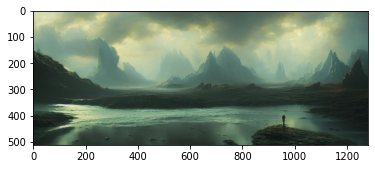

In [10]:
import matplotlib.pyplot as plt
img = Image.open(train['image'][0])
plt.imshow(img)

In [11]:
test.head(1)

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,...,phrase_1,phrase_2,phrase_3,phrase_4,phrase_5,phrase_6,phrase_7,first_seven,cs_prompt_open,cs_prompt_seven
1500,/root/.cache/huggingface/datasets/downloads/ex...,"lemonbrat studios bat fursuit, fursuiter, cand...",1758474385,50,10.0,k_lms,512,640,eaa41f839ff05c773bb8a0907424edbfeedf3ae4ccce84...,2022-08-16 19:17:00+00:00,...,a person in a costume with a cat mask on,fursuit,fursuit!!!!,furry character portrait,headshot of young female furry,furry character,macro furry,a person in costume with cat mask on fursuit f...,0.228366,0.474969


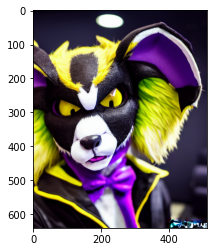

In [12]:
import matplotlib.pyplot as plt
img = Image.open(test['image'][1500])
plt.imshow(img)

# Baseline

In [13]:
!pip install clip_interrogator
!pip install sentence_transformers
!pip install transformers==4.26.1
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, models
from PIL import Image
from clip_interrogator import Config, Interrogator
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.5/787.5 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 KB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 KB 29.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 KB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 97.9 MB

In [14]:
config = Config(clip_model_name="ViT-L-14/openai")
ci_vitl = Interrogator(config)
config.blip_model = ci_vitl.blip_model
config.clip_model_name = "ViT-H-14/laion2b_s32b_b79k"
ci_vith = Interrogator(config)

Loading BLIP model...


  0%|          | 0.00/1.66G [00:00<?, ?B/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Loading CLIP model...


100%|███████████████████████████████████████| 933M/933M [00:24<00:00, 38.6MiB/s]
ViT-L-14_openai_artists.safetensors: 100%|██████████| 16.2M/16.2M [00:00<00:00, 51.3MB/s]
ViT-L-14_openai_flavors.safetensors: 100%|██████████| 155M/155M [00:01<00:00, 145MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|██████████| 146k/146k [00:00<00:00, 12.2MB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████| 307k/307k [00:00<00:00, 14.9MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|██████████| 111k/111k [00:00<00:00, 10.8MB/s]
ViT-L-14_openai_negative.safetensors: 100%|██████████| 63.2k/63.2k [00:00<00:00, 7.69MB/s]


Loaded CLIP model and data in 39.48 seconds.
Loading CLIP model...


ViT-H-14_laion2b_s32b_b79k_artists.safetensors: 100%|██████████| 21.6M/21.6M [00:00<00:00, 168MB/s]
ViT-H-14_laion2b_s32b_b79k_flavors.safetensors: 100%|██████████| 207M/207M [00:00<00:00, 211MB/s]
ViT-H-14_laion2b_s32b_b79k_mediums.safetensors: 100%|██████████| 195k/195k [00:00<00:00, 14.1MB/s]
ViT-H-14_laion2b_s32b_b79k_movements.safetensors: 100%|██████████| 410k/410k [00:00<00:00, 22.0MB/s]
ViT-H-14_laion2b_s32b_b79k_trendings.safetensors: 100%|██████████| 148k/148k [00:00<00:00, 12.9MB/s]
ViT-H-14_laion2b_s32b_b79k_negative.safetensors: 100%|██████████| 84.2k/84.2k [00:00<00:00, 8.50MB/s]

Loaded CLIP model and data in 83.92 seconds.


In [21]:
def image_to_prompt(image_path, clip_model_name,length):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    ci_vith.clip_model = ci_vith.clip_model.to(ci_vith.device)
    ci = ci_vith
    ci.config.blip_num_beams = 2 # >1 breaks for some reason
    ci.config.chunk_size = 512
    ci.config.flavor_intermediate_count = 512
    image = Image.open(image_path)

    prompt = ci.interrogate_fast(image)
    return prompt.split(',')[0:length]
image_to_prompt(df['image'][7],'ViT-H (best for Stable Diffusion 2.*)',7)

100%|██████████| 219/219 [00:01<00:00, 174.15it/s]


['a donut with strawberries on a plate next to a cup of coffee',
 ' blender donut',
 ' high quality food photography',
 ' made of glazed',
 ' donut',
 ' food photography',
 ' close up food photography']

In [16]:
class CFG:
    device = "cuda"
    seed = 1
    embedding_length = 384
    sentence_model_path = 'sentence-transformers/all-MiniLM-L6-v2'
st_model = SentenceTransformer(CFG.sentence_model_path)

In [17]:
def get_cosine_similarity(vecA,vecB):
    cosine_score = metrics.pairwise.cosine_similarity([vecA], [vecB])[0][0]
    return cosine_score

In [30]:
#Initialize data frame to store results
results_df = pd.DataFrame(columns=['length','avg_cosine_sim'])
#Loop through a variety of prompt lengths (as measured by comma-separated chunks, not as tokens)
#Initialize a list of cosine similarities
cosine_sims = []
#Loop through 200 images so that we get a more stable and accurate measure of average cosine similarity
i=7 #baseline 10 due to best cosine performance
for j in range(50):
  #Get the predicted prompt via CLIP Interrogator
  prompt = image_to_prompt(df['image'][j],'ViT-H (best for Stable Diffusion 2.*)',length=i) 
  #Combine comma-separated chunks into one 
  prompt = ",".join([str(item) for item in prompt])
  #Get embeddings for predicted prompt
  prompt_embeddings = st_model.encode(prompt)
  #Get embeddings for true prompt
  true_embeddings = st_model.encode(df['prompt'][j]).flatten()
  #Add cosine similarities to list
  cosine_sims.append(get_cosine_similarity(prompt_embeddings,true_embeddings))
#For each length, add the length and corresponding average cosine similarity to the results data frame
results_df = results_df.append({'length':i+1,'avg_cosine_sim':np.mean(cosine_sims)},ignore_index=True)

100%|██████████| 219/219 [00:00<00:00, 672.75it/s]


In [31]:
results_df

,length,avg_cosine_sim
0,8.0,0.507582


# Tuning

In [22]:
# import open_clip
# clip_model = open_clip.create_model(config.clip_model_name, precision='fp16' if config.device == 'cuda' else 'fp32')
# open_clip.load_checkpoint(clip_model, config.clip_model_path)
# clip_model.to('cuda').eval()
# config.clip_model = clip_model
# clip_preprocess = open_clip.image_transform(
#     clip_model.visual.image_size,
#     is_train = False,
#     mean = getattr(clip_model.visual, 'image_mean', None),
#     std = getattr(clip_model.visual, 'image_std', None),
# )
# ci_vith.clip_preprocess = clip_preprocess

Can tune max length, chunk_size, flavor_intermediate_count, clip_preprocess

Tuning num_beams is currently giving an error, but should definitely improve results once fixed

In [23]:
params = {
    'blip_num_beams': [1], #[1,2,4,8,12,16,24,32], #tune once back online
    'max_length' : [16,24,32,40],
    'chunk_size' : [512,1024,2048],
    'flavor_intermediate_count' : [512,1024,2048],
}

In [34]:
params = {
    'blip_num_beams': [1,2,4,8,16,24,32],
    #'max_length' : [16,24,32,40],
    'chunk_size' : [1024,2048,4096],
    'flavor_intermediate_count' : [1024,2048,4096],
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ci_vith.clip_model = ci_vith.clip_model.to(ci_vith.device)
#ci_vith.config.blip_num_beams = 1 # >1 breaks for some reason
def itp(image_path, b,m,c,f):
    ci = ci_vith
    ci.config.blip_num_beams = b
    #ci.config.max_length = m
    ci.config.chunk_size = c
    ci.config.flavor_intermediate_count = f
    prompt = ci.interrogate_fast(Image.open(image_path))
    return prompt.split(',')[0:m]

results_df = pd.DataFrame(columns=['length','avg_cosine_sim','beams','chunk_size','flavor'])
cosine_sims = [] 
m = 7 #max_length
for f in params['flavor_intermediate_count']:
  for c in params['chunk_size']:
    for b in params['blip_num_beams']:
      for j in range(50):
        prompt = itp(df['image'][j],b,m,c,f)
        prompt = ",".join([str(item) for item in prompt])
        prompt_embeddings = st_model.encode(prompt)
        true_embeddings = st_model.encode(df['prompt'][j]).flatten()
        cosine_sims.append(get_cosine_similarity(prompt_embeddings,true_embeddings))
      results_df = results_df.append({'length':m,'avg_cosine_sim':np.mean(cosine_sims),'beams':b,'chunk_size':c,'flavor':f},ignore_index=True)
      display(results_df.tail(1))
results_df

100%|██████████| 110/110 [00:00<00:00, 369.09it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
0,7.0,0.501857,1.0,1024.0,1024.0


100%|██████████| 110/110 [00:00<00:00, 345.24it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
1,7.0,0.504578,2.0,1024.0,1024.0


100%|██████████| 110/110 [00:00<00:00, 352.45it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
2,7.0,0.505842,4.0,1024.0,1024.0


100%|██████████| 110/110 [00:00<00:00, 247.47it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
3,7.0,0.505733,8.0,1024.0,1024.0


100%|██████████| 110/110 [00:00<00:00, 238.99it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
4,7.0,0.506155,16.0,1024.0,1024.0


100%|██████████| 110/110 [00:00<00:00, 364.18it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
5,7.0,0.506318,24.0,1024.0,1024.0


100%|██████████| 110/110 [00:00<00:00, 349.74it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
6,7.0,0.506075,32.0,1024.0,1024.0


100%|██████████| 55/55 [00:00<00:00, 196.07it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
7,7.0,0.505501,1.0,2048.0,1024.0


100%|██████████| 55/55 [00:00<00:00, 200.10it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
8,7.0,0.505671,2.0,2048.0,1024.0


100%|██████████| 55/55 [00:00<00:00, 199.90it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
9,7.0,0.505917,4.0,2048.0,1024.0


100%|██████████| 55/55 [00:00<00:00, 150.79it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
10,7.0,0.50585,8.0,2048.0,1024.0


100%|██████████| 55/55 [00:00<00:00, 190.87it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
11,7.0,0.505998,16.0,2048.0,1024.0


100%|██████████| 55/55 [00:00<00:00, 195.42it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
12,7.0,0.506068,24.0,2048.0,1024.0


100%|██████████| 55/55 [00:00<00:00, 126.21it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
13,7.0,0.505949,32.0,2048.0,1024.0


100%|██████████| 28/28 [00:00<00:00, 37.77it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
14,7.0,0.505691,1.0,4096.0,1024.0


100%|██████████| 28/28 [00:00<00:00, 93.62it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
15,7.0,0.505804,2.0,4096.0,1024.0


100%|██████████| 28/28 [00:00<00:00, 98.99it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
16,7.0,0.505965,4.0,4096.0,1024.0


100%|██████████| 28/28 [00:00<00:00, 53.44it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
17,7.0,0.505938,8.0,4096.0,1024.0


100%|██████████| 28/28 [00:00<00:00, 52.65it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
18,7.0,0.506043,16.0,4096.0,1024.0


100%|██████████| 28/28 [00:00<00:00, 52.06it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
19,7.0,0.506101,24.0,4096.0,1024.0


100%|██████████| 28/28 [00:00<00:00, 95.75it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
20,7.0,0.506034,32.0,4096.0,1024.0


100%|██████████| 110/110 [00:00<00:00, 362.72it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
21,7.0,0.505845,1.0,1024.0,2048.0


100%|██████████| 110/110 [00:00<00:00, 369.01it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
22,7.0,0.505908,2.0,1024.0,2048.0


100%|██████████| 110/110 [00:00<00:00, 360.79it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
23,7.0,0.50601,4.0,1024.0,2048.0


100%|██████████| 110/110 [00:00<00:00, 343.55it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
24,7.0,0.505986,8.0,1024.0,2048.0


100%|██████████| 110/110 [00:00<00:00, 238.57it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
25,7.0,0.506058,16.0,1024.0,2048.0


100%|██████████| 110/110 [00:00<00:00, 354.60it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
26,7.0,0.506098,24.0,1024.0,2048.0


100%|██████████| 110/110 [00:00<00:00, 365.25it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
27,7.0,0.506045,32.0,1024.0,2048.0


100%|██████████| 55/55 [00:00<00:00, 196.51it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
28,7.0,0.505887,1.0,2048.0,2048.0


100%|██████████| 55/55 [00:00<00:00, 190.64it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
29,7.0,0.505925,2.0,2048.0,2048.0


100%|██████████| 55/55 [00:00<00:00, 194.53it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
30,7.0,0.505997,4.0,2048.0,2048.0


100%|██████████| 55/55 [00:00<00:00, 193.75it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
31,7.0,0.505971,8.0,2048.0,2048.0


100%|██████████| 55/55 [00:00<00:00, 191.43it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
32,7.0,0.506021,16.0,2048.0,2048.0


100%|██████████| 55/55 [00:00<00:00, 174.83it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
33,7.0,0.506047,24.0,2048.0,2048.0


100%|██████████| 55/55 [00:00<00:00, 105.34it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
34,7.0,0.506,32.0,2048.0,2048.0


100%|██████████| 28/28 [00:00<00:00, 96.65it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
35,7.0,0.505891,1.0,4096.0,2048.0


100%|██████████| 28/28 [00:00<00:00, 100.32it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
36,7.0,0.505935,2.0,4096.0,2048.0


100%|██████████| 28/28 [00:00<00:00, 98.17it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
37,7.0,0.506003,4.0,4096.0,2048.0


100%|██████████| 28/28 [00:00<00:00, 99.52it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
38,7.0,0.50599,8.0,4096.0,2048.0


100%|██████████| 28/28 [00:00<00:00, 58.16it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
39,7.0,0.506038,16.0,4096.0,2048.0


100%|██████████| 28/28 [00:00<00:00, 99.91it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
40,7.0,0.506067,24.0,4096.0,2048.0


100%|██████████| 28/28 [00:00<00:00, 62.41it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
41,7.0,0.506034,32.0,4096.0,2048.0


100%|██████████| 110/110 [00:00<00:00, 187.53it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
42,7.0,0.505937,1.0,1024.0,4096.0


100%|██████████| 110/110 [00:00<00:00, 301.52it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
43,7.0,0.505968,2.0,1024.0,4096.0


100%|██████████| 110/110 [00:00<00:00, 232.16it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
44,7.0,0.506022,4.0,1024.0,4096.0


100%|██████████| 110/110 [00:00<00:00, 235.00it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
45,7.0,0.506008,8.0,1024.0,4096.0


100%|██████████| 110/110 [00:00<00:00, 346.39it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
46,7.0,0.506047,16.0,1024.0,4096.0


100%|██████████| 110/110 [00:00<00:00, 298.26it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
47,7.0,0.50607,24.0,1024.0,4096.0


100%|██████████| 110/110 [00:00<00:00, 348.58it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
48,7.0,0.50604,32.0,1024.0,4096.0


100%|██████████| 55/55 [00:00<00:00, 125.14it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
49,7.0,0.505949,1.0,2048.0,4096.0


100%|██████████| 55/55 [00:00<00:00, 196.66it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
50,7.0,0.50597,2.0,2048.0,4096.0


100%|██████████| 55/55 [00:00<00:00, 128.55it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
51,7.0,0.506012,4.0,2048.0,4096.0


100%|██████████| 55/55 [00:00<00:00, 194.27it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
52,7.0,0.505996,8.0,2048.0,4096.0


100%|██████████| 55/55 [00:00<00:00, 107.66it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
53,7.0,0.506026,16.0,2048.0,4096.0


100%|██████████| 55/55 [00:00<00:00, 189.16it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
54,7.0,0.506042,24.0,2048.0,4096.0


100%|██████████| 55/55 [00:00<00:00, 193.09it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
55,7.0,0.506013,32.0,2048.0,4096.0


100%|██████████| 28/28 [00:00<00:00, 98.55it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
56,7.0,0.505944,1.0,4096.0,4096.0


100%|██████████| 28/28 [00:00<00:00, 66.44it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
57,7.0,0.505971,2.0,4096.0,4096.0


100%|██████████| 28/28 [00:00<00:00, 62.19it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
58,7.0,0.506014,4.0,4096.0,4096.0


100%|██████████| 28/28 [00:00<00:00, 65.22it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
59,7.0,0.506006,8.0,4096.0,4096.0


100%|██████████| 28/28 [00:00<00:00, 95.99it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
60,7.0,0.506037,16.0,4096.0,4096.0


100%|██████████| 28/28 [00:00<00:00, 61.83it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
61,7.0,0.506056,24.0,4096.0,4096.0


100%|██████████| 28/28 [00:00<00:00, 94.44it/s]


,length,avg_cosine_sim,beams,chunk_size,flavor
62,7.0,0.506034,32.0,4096.0,4096.0


,length,avg_cosine_sim,beams,chunk_size,flavor
0,7.0,0.501857,1.0,1024.0,1024.0
1,7.0,0.504578,2.0,1024.0,1024.0
2,7.0,0.505842,4.0,1024.0,1024.0
3,7.0,0.505733,8.0,1024.0,1024.0
4,7.0,0.506155,16.0,1024.0,1024.0
...,...,...,...,...,...
58,7.0,0.506014,4.0,4096.0,4096.0
59,7.0,0.506006,8.0,4096.0,4096.0
60,7.0,0.506037,16.0,4096.0,4096.0
61,7.0,0.506056,24.0,4096.0,4096.0


In [35]:
results_df.to_csv('finetune.csv')

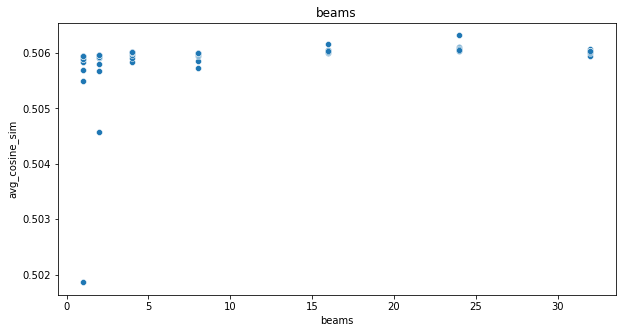

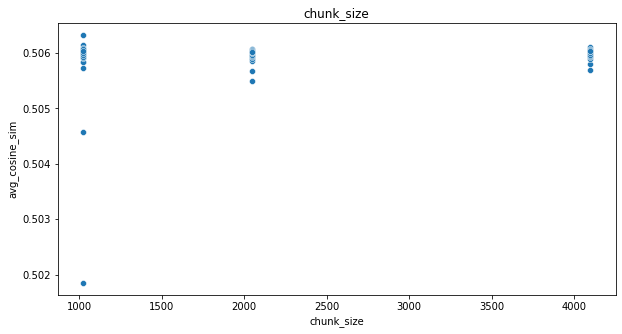

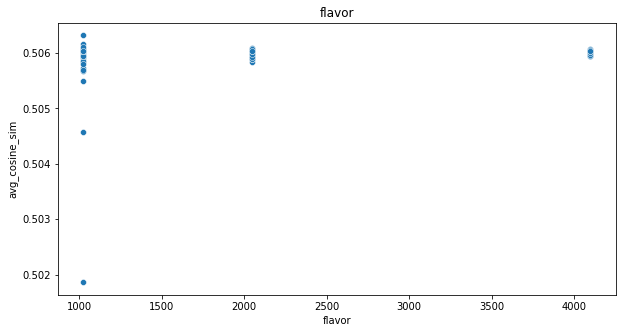

In [44]:
for p in ['beams','chunk_size','flavor']:
  plt.figure(figsize=(10,5))
  sns.scatterplot(x=results_df[p],y=results_df['avg_cosine_sim'])
  plt.title(p)

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
results_df = pd.read_csv('finetune.csv')
results_df

,Unnamed: 0,length,avg_cosine_sim,beams,chunk_size,flavor
0,0,7.0,0.501857,1.0,1024.0,1024.0
1,1,7.0,0.504578,2.0,1024.0,1024.0
2,2,7.0,0.505842,4.0,1024.0,1024.0
3,3,7.0,0.505733,8.0,1024.0,1024.0
4,4,7.0,0.506155,16.0,1024.0,1024.0
...,...,...,...,...,...,...
58,58,7.0,0.506014,4.0,4096.0,4096.0
59,59,7.0,0.506006,8.0,4096.0,4096.0
60,60,7.0,0.506037,16.0,4096.0,4096.0
61,61,7.0,0.506056,24.0,4096.0,4096.0


<Axes: xlabel='beams', ylabel='avg_cosine_sim'>

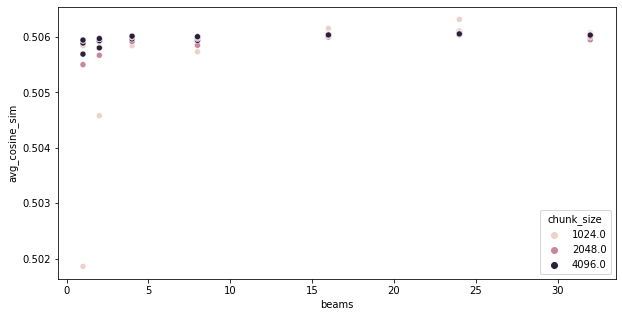

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.scatterplot(x=results_df['beams'],y=results_df['avg_cosine_sim'],hue=results_df['chunk_size'])

<Axes: xlabel='chunk_size', ylabel='avg_cosine_sim'>

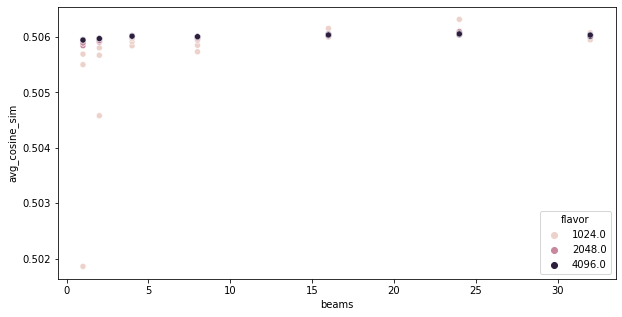

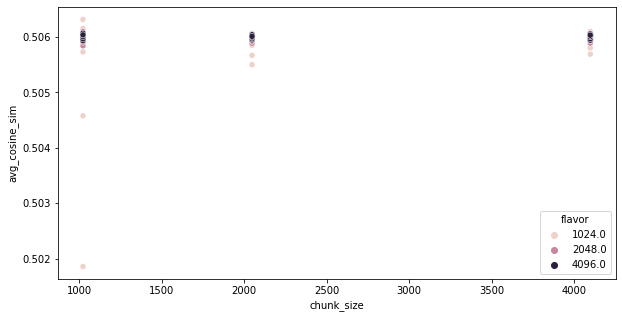

In [5]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=results_df['beams'],y=results_df['avg_cosine_sim'],hue=results_df['flavor'])
plt.figure(figsize=(10,5))
sns.scatterplot(x=results_df['chunk_size'],y=results_df['avg_cosine_sim'],hue=results_df['flavor'])